In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import SQL_queries as q
from IPython.display import display, HTML

# Exploratory Data Analysis - Pittsburgh Penguins Playoff Data - 2017
--------
### To begin the EDA process, I use SQL queries to build DataFrames to include:

* general information about each game, play, event, and event locations
* skater stats
* team stats
* shift information
### [Check out the queries for yourself](SQL_queries.py)
----

In [3]:
 conn = sqlite3.connect('NHL_data.db')

In [4]:
pens_2017_playoff_df = pd.read_sql_query(q.playoff_2017_data_query, conn)
pens_2017_playoff_df.head()

,Unnamed: 0,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTimeRemaining,dateTime,goals_away,goals_home,play_id,game_id,player_id,playerType,firstName,lastName
0,3211410,2016030141_4,2016030141,29.0,5.0,Faceoff,None,0.0,0.0,1,...,1200.0,2017-04-13 00:40:08,0,0,2016030141_4,2016030141,8471273,Winner,Brandon,Dubinsky
1,3211410,2016030141_4,2016030141,29.0,5.0,Faceoff,None,0.0,0.0,1,...,1200.0,2017-04-13 00:40:08,0,0,2016030141_4,2016030141,8471675,Loser,Sidney,Crosby
2,3211411,2016030141_5,2016030141,29.0,5.0,Hit,None,3.0,39.0,1,...,1182.0,2017-04-13 00:40:40,0,0,2016030141_5,2016030141,8476432,Hitter,Boone,Jenner
3,3211411,2016030141_5,2016030141,29.0,5.0,Hit,None,3.0,39.0,1,...,1182.0,2017-04-13 00:40:40,0,0,2016030141_5,2016030141,8477404,Hittee,Jake,Guentzel
4,3211412,2016030141_6,2016030141,29.0,5.0,Hit,None,-91.0,-36.0,1,...,1178.0,2017-04-13 00:40:44,0,0,2016030141_6,2016030141,8471273,Hitter,Brandon,Dubinsky


### Next, let's explore and clean it up a little:
- take a look at columns and unique values for important categorical columns
- find and delete duplicate values
- identify null values, and determine whether to drop values
- replace team_id_for and team_id_against with team name abbreviations, for easier readability 

In [6]:
pens_2017_playoff_df.columns

Index(['Unnamed: 0', 'play_id', 'game_id', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'play_id', 'game_id', 'player_id', 'playerType',
       'firstName', 'lastName'],
      dtype='object')

In [7]:
#find and delete duplicated values
pens_2017_playoff_df = pens_2017_playoff_df.iloc[:,~pens_2017_playoff_df.columns.duplicated()]
#drop unwanted columns
pens_2017_playoff_df = pens_2017_playoff_df.drop(['Unnamed: 0','player_id'], axis=1)

In [8]:
#verify
pens_2017_playoff_df.columns

Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'playerType', 'firstName', 'lastName'],
      dtype='object')

In [10]:
#Display unique values for Event, Secondary, and Period Columns
print(f' Event Types: {pens_2017_playoff_df.event.unique()} \n')
print(f'Secondary Types: {pens_2017_playoff_df.secondaryType.unique()} \n')
print(f' Period Types: {pens_2017_playoff_df.periodType.unique()} \n')

 Event Types: ['Faceoff' 'Hit' 'Shot' 'Takeaway' 'Missed Shot' 'Blocked Shot' 'Giveaway'
 'Penalty' 'Goal'] 

Secondary Types: [None 'Wrist Shot' 'Snap Shot' 'Backhand' 'Slap Shot' 'Hooking' 'Tripping'
 'Roughing' 'Interference' 'Tip-In' 'Holding the stick' 'Holding'
 'Wrap-around' 'Cross checking' 'Slashing' 'Misconduct'
 'Too many men on the ice' 'Hi-sticking' 'Interference - Goalkeeper'
 'Delaying Game - Puck over glass' 'Delay of game' 'Game misconduct'
 'Closing hand on puck' 'Charging' 'Boarding' 'Hi stick - double minor'
 'Fighting' 'Deflected' 'Unsportsmanlike conduct' 'Match penalty'] 

 Period Types: ['REGULAR' 'OVERTIME'] 


In [11]:
#check for null values:
pens_2017_playoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11559 entries, 0 to 11558
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   play_id              11559 non-null  object 
 1   game_id              11559 non-null  int64  
 2   team_id_for          11559 non-null  float64
 3   team_id_against      11559 non-null  float64
 4   event                11559 non-null  object 
 5   secondaryType        3281 non-null   object 
 6   x                    11535 non-null  float64
 7   y                    11535 non-null  float64
 8   period               11559 non-null  int64  
 9   periodType           11559 non-null  object 
 10  periodTime           11559 non-null  int64  
 11  periodTimeRemaining  11559 non-null  float64
 12  dateTime             11559 non-null  object 
 13  goals_away           11559 non-null  int64  
 14  goals_home           11559 non-null  int64  
 15  playerType           11559 non-null 

In [12]:
secondary_type_percent_null_2 = (pens_2017_playoff_df['secondaryType'].isnull().sum())/11559*100
print(f'2017 Secondary Type Null Percent :{secondary_type_percent_null_2:.2f}%')

2017 Secondary Type Null Percent :71.62%


In [13]:
#check to see which events have a secondary type:
pens_2017_playoff_df.dropna().event.unique()

array(['Shot', 'Penalty', 'Goal'], dtype=object)

In [14]:
#After consideration, I've decided to drop the column 'secondaryType'.
pens_2017_playoff_df = pens_2017_playoff_df.drop('secondaryType',axis=1)

In [15]:
#query the NHL database for all team numbers and their associated abbreviations
team_ids_df = pd.read_sql_query(q.get_abb_query, conn)
#create a dictionary from the abbreviation df
abb_dict = pd.Series(team_ids_df.abbreviation.values,index=team_ids_df.team_id).to_dict()
#replace row values in the dataframe with values from the dictionary
pens_2017_playoff_df = pens_2017_playoff_df.replace({'team_id_for':abb_dict})
pens_2017_playoff_df = pens_2017_playoff_df.replace({'team_id_against':abb_dict})
pens_2017_playoff_df = pens_2017_playoff_df.rename(columns={'team_id_for':'team_for', 'team_id_against':'team_against'})

In [16]:
#confirm replacement
pens_2017_playoff_df.head()

,play_id,game_id,team_for,team_against,event,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,playerType,firstName,lastName
0,2016030141_4,2016030141,CBJ,PIT,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2017-04-13 00:40:08,0,0,Winner,Brandon,Dubinsky
1,2016030141_4,2016030141,CBJ,PIT,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2017-04-13 00:40:08,0,0,Loser,Sidney,Crosby
2,2016030141_5,2016030141,CBJ,PIT,Hit,3.0,39.0,1,REGULAR,18,1182.0,2017-04-13 00:40:40,0,0,Hitter,Boone,Jenner
3,2016030141_5,2016030141,CBJ,PIT,Hit,3.0,39.0,1,REGULAR,18,1182.0,2017-04-13 00:40:40,0,0,Hittee,Jake,Guentzel
4,2016030141_6,2016030141,CBJ,PIT,Hit,-91.0,-36.0,1,REGULAR,22,1178.0,2017-04-13 00:40:44,0,0,Hitter,Brandon,Dubinsky


### Now that the DataFrame is cleaned up, I want to group it by game_id, into the following rounds for the playoffs:
| Year   | 2017                  |
|--------|-----------------------|
| Round 1 | Columbus Blue Jackets     |
| Round 2 | Washington Capitals   |
| Round 3 | Ottowa Senators   |
| Final | Nashville Predators       | 

To accomplish this, I'll have to groupby 'game_id', and do a little data wrangling with the team names

In [18]:
#groupby game_id
games_teams_2017 = pens_2017_playoff_df.groupby('game_id').team_for.unique().reset_index()
#display current state
games_teams_2017.head()

,game_id,team_for
0,2016030141,"[CBJ, PIT]"
1,2016030142,"[CBJ, PIT]"
2,2016030143,"[PIT, CBJ]"
3,2016030144,"[PIT, CBJ]"
4,2016030145,"[PIT, CBJ]"


In [19]:
#remove PIT, and show only the opposing team:
games_teams_2017['opposing_team'] = games_teams_2017['team_for'].apply(
    lambda row: [val for val in row if val != 'PIT']
)
#remove defunct column
games_teams_2017.drop('team_for',axis=1, inplace=True)
#display new state:
games_teams_2017.head()

,game_id,opposing_team
0,2016030141,[CBJ]
1,2016030142,[CBJ]
2,2016030143,[CBJ]
3,2016030144,[CBJ]
4,2016030145,[CBJ]


In [20]:
#isolate the team name, since it has become a list instead of a string:
games_teams_2017['opposing_team'] = games_teams_2017['opposing_team'].str[0]
#show how many games per team:
games_teams_2017['opposing_team'].value_counts()

opposing_team
WSH    6
OTT    6
CBJ    5
NSH    5
Name: count, dtype: int64

In [22]:
#create a list of game_ids for each playoff round:
CBJ_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='CBJ'].game_id)
NSH_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='NSH'].game_id)
OTT_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='OTT'].game_id)
WSH_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='WSH'].game_id)

In [27]:
#use the lists above to filter into rounds:
Round_1_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(CBJ_2017_games)]
Round_2_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(WSH_2017_games)]
Round_3_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(OTT_2017_games)]
Round_4_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(NSH_2017_games)]
All_rounds_2017 = [Round_1_2017,Round_2_2017,Round_3_2017,Round_4_2017]

### Now that we have the data sorted into rounds, let's calculate some more player stats per playoff round:
- Faceoff Differential (Wins vs. Losses)
- Penalty Differential
- Shot Success (% of shots on net resulting in goals)

#### Before beginning, we need to filter the dataframes to only show penguins players
- use a csv file containing the roster for 2016
- separate good and bad plays, to determine which player to filter on (team_against or team_for)

In [25]:
#load the roster into a df
Pens_2017_roster = pd.read_csv('Pens_2017_roster.csv')
#replace special characters with plain
Pens_2017_roster['Player'] = Pens_2017_roster['Player'].replace({r'\(C\)': '', '-': '', 'ö': 'o', 'ä': 'a', 'ü': 'u'}, regex=True).str.strip()
#split into first and last names
Pens_2017_roster[['firstName', 'lastName']] = Pens_2017_roster['Player'].str.split(expand=True)
#create a roster list by last name
Pens_2017_roster_list = list(Pens_2017_roster['lastName'])

## First, let's take a look at faceoff differentials and how they changed over the course of the 2016 Playoffs

### Faceoff Differential in Hockey

Faceoff differential is a critical metric in hockey that measures a player's effectiveness in winning faceoffs compared to their opponents. Faceoffs are pivotal moments during a game, often determining puck possession and control. This metric is calculated by taking the ratio of faceoffs won (Winner) to the total faceoffs (Winner + Loser) for each player.

### Importance of Faceoff Differential

Faceoff wins contribute directly to a team's ability to control the puck and initiate offensive plays. Players with a positive faceoff differential excel in gaining possession for their team, leading to increased scoring opportunities and defensive stability. Faceoff specialists are particularly valuable during critical moments, such as power plays and penalty kills.

### Plot Interpretation

The line plot above illustrates the faceoff differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized faceoff differential. The legend displays each player's name along with their average faceoff differential over the four rounds.

### Calculation Methodology

Faceoff differentials were calculated for each player by analyzing two types of faceoffs: faceoffs won (Winner) and faceoffs lost (Loser). The formula used is as follows:

**Faceoff Differential = Faceoffs Won \ (Faceoffs Won + Faceoffs Lost)**

To normalize the faceoff differential, the calculated values were averaged over the four playoff rounds, providing a per-round metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Players with positive differentials excel in winning faceoffs and contributing to their team's overall control of the game.
- Negative differentials may suggest areas for improvement in faceoff skills.

This analysis aims to provide insights into each player's impact during faceoff situations and their contribution to team success.


In [26]:
#calculate faceoff wins or losses:
def calculate_faceoffs(round_df, player_type):
    faceoffs = round_df[round_df['playerType'] == player_type]
    faceoffs = faceoffs.groupby('lastName')['playerType'].value_counts().reset_index(name=f'count_{player_type}')
    return faceoffs

#calculate faceoff differential for a given round
def calculate_faceoff_stats(wins, losses):
    faceoff_stats = wins.merge(losses, on='lastName', how='left') 
    faceoff_stats['Differential'] = faceoff_stats[f'count_Winner'] / (
            faceoff_stats[f'count_Winner'] + faceoff_stats[f'count_Loser'])
    return faceoff_stats

#print top five differentials for a given round
def print_top_five_differentials(df, round_number):
    print(f'Top Five Faceoff Differentials, Round {round_number}, 2016')
    print(df[['lastName', 'Differential']].sort_values(by='Differential', ascending=False).head(5), '\n\n')

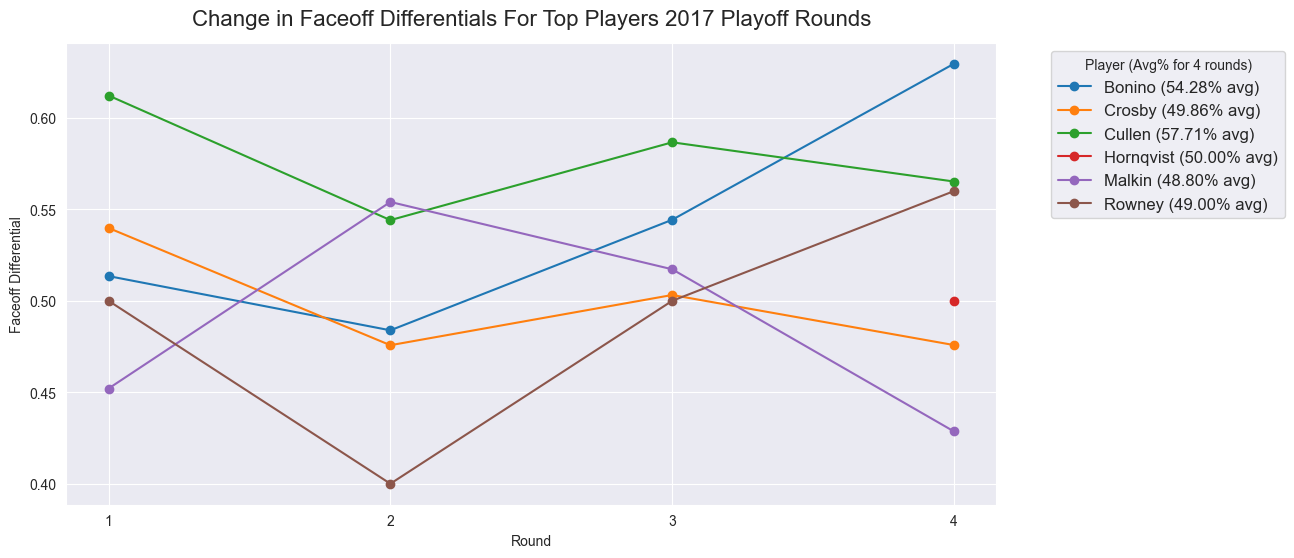

In [85]:
#store all faceoff differentials
all_stats_all_rounds = pd.DataFrame()

#store the number of points for each player
player_points = {}

for i, round_df in enumerate(All_rounds_2017, start=1):
    round_name = f'Round_{i}'

    #calculate faceoff wins and losses
    wins = calculate_faceoffs(round_df, 'Winner')
    losses = calculate_faceoffs(round_df, 'Loser')

    #calculate faceoff stats
    faceoff_stats = calculate_faceoff_stats(wins, losses)

    #filter faceoff_stats for players in the roster list
    faceoff_stats_filtered = faceoff_stats[faceoff_stats['lastName'].isin(Pens_2017_roster_list)].copy()

    #add a column for the round number using .loc
    faceoff_stats_filtered.loc[:, 'round_number'] = i

    #concatenate faceoff stats for the current round to the overall dataframe
    all_stats_all_rounds = pd.concat([all_stats_all_rounds, faceoff_stats_filtered], ignore_index=True)

    #update player_points dictionary
    for player in faceoff_stats_filtered['lastName'].unique():
        player_points[player] = player_points.get(player, 0) + 1

#get unique players with at least two points
players_with_two_points = [player for player, points in player_points.items() if points >= 2]

#filter faceoff stats for players with at least two points
all_stats_all_rounds_filtered = all_stats_all_rounds[all_stats_all_rounds['lastName'].isin(players_with_two_points)]

#create a consistent color mapping for players
player_color_mapping = {player: sns.color_palette()[i] for i, player in enumerate(players_with_two_points)}

# Sort players to ensure consistency in legend order
players_with_two_points_sorted = sorted(players_with_two_points)

# Plot the change in faceoff differentials over time using seaborn
plt.figure(figsize=(12, 6))

for player in players_with_two_points_sorted:
    player_data = all_stats_all_rounds_filtered[all_stats_all_rounds_filtered['lastName'] == player]
    avg_diff = player_data['Differential'].mean()
    
    plt.plot(
        player_data['round_number'],
        player_data['Differential'],
        label=f'{player} ({avg_diff:.2%} avg)',
        color=player_color_mapping[player],
        marker='o',  # Set the marker type as needed
        linestyle='-',  # Set the line style as needed
    )

# Modify x-axis to show only integers 1-4
plt.xticks(range(1, 5))

plt.title('Change in Faceoff Differentials For Top Players 2017 Playoff Rounds', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Faceoff Differential')
plt.legend(title='Player (Avg% for 4 rounds)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()


As seen in the graph above, in 2017 Nick Bonino started with a similar faceoff success rate in the first and second rounds as in 2016 (roughly 50%), but dramatically improved his faceoff differential in the third and then fourth rounds. 

## Next, take a look at Penalties


### Penalty Differential in Hockey

Penalty differential in hockey is a metric that quantifies a player's impact on penalties during a game. It is calculated by taking the difference between the number of penalties drawn (DrewBy) and the number of penalties taken (PenaltyOn) by a player. A positive penalty differential indicates that a player draws more penalties than they take, while a negative value suggests the opposite.

### Importance of Penalty Differential

Penalty differential is a crucial metric in hockey analytics as it reflects a player's ability to create power-play opportunities for their team while minimizing time spent shorthanded. Players with a positive penalty differential contribute to their team's offensive advantage, putting additional pressure on the opposing team. On the other hand, a negative penalty differential may indicate a player who takes more penalties than they draw, potentially putting their team at a disadvantage.

### Plot Interpretation

The line plot below illustrates the penalty differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized penalty differential. The legend displays each player's name along with their total penalty differential over the four rounds.

### Calculation Methodology

Penalty differentials were calculated for each player by analyzing two types of penalties: penalties drawn (DrewBy) and penalties taken (PenaltyOn). The formula used is as follows:

**Penalty Differential = Penalties Drawn - Penalties Taken**

To normalize the penalty differential, the calculated values were divided by the total number of games played by each player to provide a per-game metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Positive values indicate players who contribute positively to their team by drawing more penalties than they take.
- Negative values suggest players who may need to minimize their penalty-taking tendencies.

This analysis aims to provide insights into player discipline and their impact on team performance during the playoffs.


In [90]:
player_games_played = {}

# Iterate through each round's dataframe
for round_df in All_rounds_2017:
    # Extract unique game IDs for each player
    games_played_per_player = round_df.groupby('lastName')['game_id'].nunique().reset_index(name='gamesPlayed')

    # Update the dictionary with the total games played for each player
    for index, row in games_played_per_player.iterrows():
        player = row['lastName']
        games_played = row['gamesPlayed']

        player_games_played[player] = player_games_played.get(player, 0) + games_played


C:\Users\User\AppData\Local\Temp\ipykernel_8040\3661263707.py:82: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for line, style in zip(line2d_objects, penalty_legend.legendHandles):


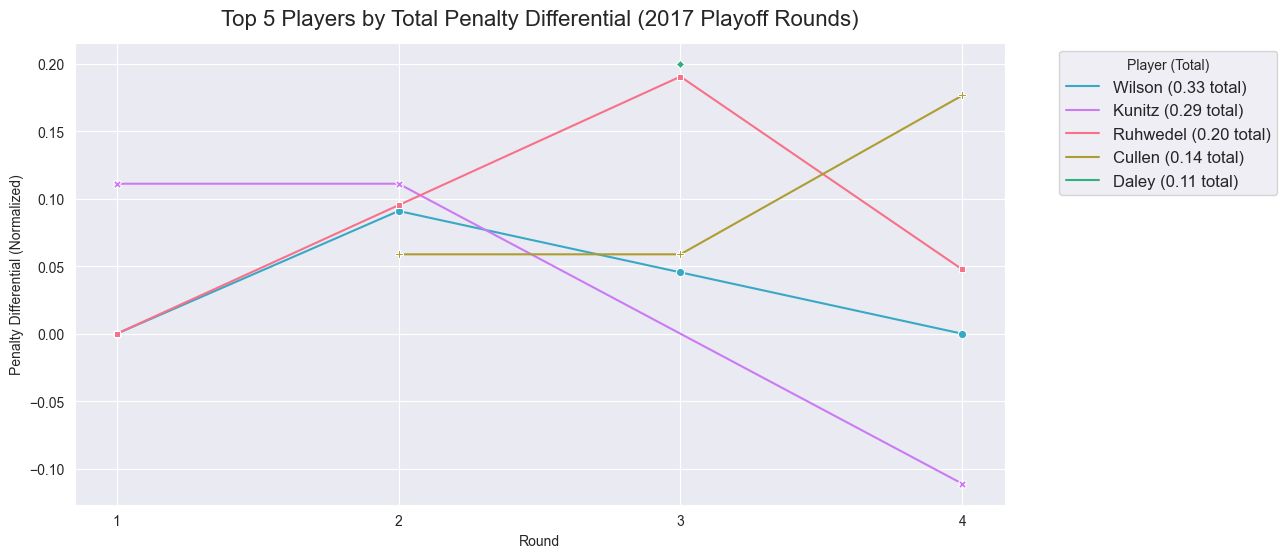

In [91]:
all_penalty_stats_all_rounds = pd.DataFrame()

# Store the total penalty differential for each player
player_total_penalty_diff = {}

for i, round_df in enumerate(All_rounds_2017, start=1):
    #calculate penalty differentials
    penalties_on = round_df[round_df['playerType'] == 'PenaltyOn'].groupby('lastName').size().reset_index(name='PenaltiesOn')
    penalties_by = round_df[round_df['playerType'] == 'DrewBy'].groupby('lastName').size().reset_index(name='PenaltiesBy')

    penalty_stats = pd.merge(penalties_on, penalties_by, how='outer', left_on='lastName', right_on='lastName')
    penalty_stats['PenaltiesBy'].fillna(0, inplace=True)
    penalty_stats['Differential'] = penalty_stats['PenaltiesOn'] - penalty_stats['PenaltiesBy']

    #filter penalty_stats for players in the roster list
    penalty_stats_filtered = penalty_stats[penalty_stats['lastName'].isin(Pens_2017_roster_list)].copy()

    #add a column for the round number
    penalty_stats_filtered.loc[:, 'round_number'] = i

    #handle NaN values and division by zero
    penalty_stats_filtered['Differential'] = penalty_stats_filtered['Differential'].fillna(0)
    penalty_stats_filtered['Differential'] /= penalty_stats_filtered['lastName'].map(player_games_played).replace(0, 1)

    #concatenate penalty stats for the current round to the overall dataframe
    all_penalty_stats_all_rounds = pd.concat([all_penalty_stats_all_rounds, penalty_stats_filtered], ignore_index=True)

    #update player_total_penalty_diff dictionary
    for player, diff in zip(penalty_stats_filtered['lastName'], penalty_stats_filtered['Differential']):
        player_total_penalty_diff[player] = player_total_penalty_diff.get(player, 0) + diff

#get the top 5 players by total penalty differential (excluding NaN values)
top_n_players = sorted(player_total_penalty_diff, key=player_total_penalty_diff.get, reverse=True)[:5] 

#filter penalty stats for the top N players
all_penalty_stats_all_rounds_filtered = all_penalty_stats_all_rounds[all_penalty_stats_all_rounds['lastName'].isin(top_n_players)]

#create a larger color palette for players
larger_palette = sns.color_palette("husl", n_colors=len(top_n_players))

#create a consistent color mapping for players
player_penalty_color_mapping = {player: larger_palette[i] for i, player in enumerate(top_n_players)}

#plot the penalty differentials over time using seaborn
plt.figure(figsize=(12, 6))
penalty_plot = sns.lineplot(
    data=all_penalty_stats_all_rounds_filtered,
    x='round_number',
    y='Differential',
    hue='lastName',
    palette=player_penalty_color_mapping,
    style='lastName',
    markers=True,
    dashes=False,
)

#modify x-axis to show only integers 1-4
plt.xticks(range(1, i + 1))

#add total penalty differential to the legend with appropriate line styles
penalty_legend_labels = []
for player, line_style in zip(top_n_players, penalty_plot.lines):
    total_diff = player_total_penalty_diff[player]
    penalty_legend_labels.append(f'{player} ({total_diff:.2f} total)')

#explicitly set the line styles in the legend
penalty_legend = plt.legend(
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

#get the handles for the lines in the plot
handles, _ = penalty_plot.get_legend_handles_labels()

#create a list of Line2D objects
line2d_objects = [plt.Line2D([0], [0], color=handle.get_color(), linestyle='-', linewidth=handle.get_linewidth()) for handle in handles]

#update the line styles in the legend
for line, style in zip(line2d_objects, penalty_legend.legendHandles):
    style.set_linestyle('-')  # Set the desired line style here

#update the legend
penalty_legend = plt.legend(
    line2d_objects,
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

plt.title('Top 5 Players by Total Penalty Differential (2017 Playoff Rounds)', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Penalty Differential (Normalized)')
plt.show()

**Analysis**
The analysis of penalty differentials for the top five players in the 2016 playoff rounds reveals an interesting trend. Contrary to expectations, the top performers in terms of penalty differentials are not the well-known star players on the team. In fact, the players with the highest penalty differentials are not among the recognized names. This unexpected finding challenges the common assumption that top-performing players, who often dominate offensive and defensive statistics, would also lead in penalty differentials.

**Hypothesis**
One plausible explanation for this discrepancy is that the players with the highest penalty differentials may specialize in a more physical style of play. While star players focus on scoring goals and creating opportunities, these less-recognized players may contribute to the team by engaging in more aggressive and physical aspects of the game. Their playing style might lead to higher instances of penalties drawn or committed, influencing the penalty differentials.

Additionally, it's possible that the top players on the team are more strategic and disciplined in their play, avoiding unnecessary penalties. These star players may prioritize maintaining on-ice presence and avoiding penalties that could jeopardize their team's chances of success. In contrast, players with higher penalty differentials may be involved in more physical confrontations or play in a manner that results in a greater number of penalties.

**Conclusion**
In conclusion, the analysis suggests that penalty differentials alone may not be a comprehensive indicator of a player's overall contribution or importance to the team. The unique playing styles and roles of different players contribute to a nuanced understanding of team dynamics beyond traditional metrics. Further investigation into the specific playing styles and roles of players with high penalty differentials could provide additional insights into the dynamics of successful hockey teams.


#### Now, let's sort the good and bad plays, in order to visualize some good and bad plays for the HBK line throughout the season

In [29]:
#sort good and bad plays
def sort_good_bad_plays(df):
    good_plays_df = df.loc[((df['playerType'].isin(['Hitter','Blocker','Scorer','Shooter'])) | (df['event']=='Takeaway'))]
    bad_plays_df = df.loc[(df['playerType'].isin(['Hittee','Shooter','DrewBy'])) | (df['event']=='Giveaway')]
    return good_plays_df, bad_plays_df

In [37]:
Round_1_2017_good_plays, Round_1_2017_bad_plays = sort_good_bad_plays(Round_1_2017)
Round_2_2017_good_plays, Round_2_2017_bad_plays = sort_good_bad_plays(Round_2_2017)
Round_3_2017_good_plays, Round_3_2017_bad_plays = sort_good_bad_plays(Round_3_2017)
Round_4_2017_good_plays, Round_4_2017_bad_plays = sort_good_bad_plays(Round_4_2017)

In [38]:
Round_1_2017_good_plays = Round_1_2017_good_plays[Round_1_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_1_2017_bad_plays = Round_1_2017_bad_plays[Round_1_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

Round_2_2017_good_plays = Round_2_2017_good_plays[Round_2_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_2_2017_bad_plays = Round_2_2017_bad_plays[Round_2_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

Round_3_2017_good_plays = Round_3_2017_good_plays[Round_3_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_3_2017_bad_plays = Round_3_2017_bad_plays[Round_3_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

Round_4_2017_good_plays = Round_4_2017_good_plays[Round_4_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_4_2017_bad_plays = Round_4_2017_bad_plays[Round_4_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

good_plays_2017_all_rounds = [Round_1_2017_good_plays, Round_2_2017_good_plays, Round_3_2017_good_plays, Round_4_2017_good_plays]
bad_plays_2017_all_rounds = [Round_1_2017_bad_plays, Round_2_2017_bad_plays, Round_3_2017_bad_plays, Round_4_2017_bad_plays]

In [39]:
#take a look at the playerType values:
good_player_types = Round_1_2017_good_plays.playerType.unique()
bad_player_types = Round_1_2017_bad_plays.playerType.unique()
print(f'good player types:{good_player_types}\nbad player types:{bad_player_types}\n')
#leave takeaways separate for now:
good_player_types = np.delete(good_player_types,2,0)
bad_player_types  = np.delete(bad_player_types,2,0)
#verify deletion:
print(f'coorected good player types:{good_player_types}\ncorrected bad player types:{bad_player_types}')

good player types:['Shooter' 'Hitter' 'PlayerID' 'Blocker' 'Scorer']
bad player types:['Hittee' 'Shooter' 'PlayerID' 'DrewBy']

coorected good player types:['Shooter' 'Hitter' 'Blocker' 'Scorer']
corrected bad player types:['Hittee' 'Shooter' 'DrewBy']


In [40]:
def plotHockeyPoints_all_rounds(round_dfs, column, column_filter, players_of_interest):
    """
    Plot play points on the ice for all rounds, differentiating colors for each dataframe.

    :param round_dfs: List of DataFrames for each round
    :param column: This is the category that you are plotting on
    :param column_filter: Choose a way to filter the category
    :param players_of_interest: List of players to include
    :return: An image of the x, y coordinates for each play fitting the filter, overlayed on a hockey rink.
    """
    #combine all rounds into a single DataFrame
    combined_df = pd.concat(round_dfs)

    plt.figure(figsize=(10, 8))

    #filter the combined DataFrame
    scatter_data = combined_df.loc[(combined_df[column] == column_filter) & (combined_df['lastName'].isin(players_of_interest))]

    # Plot with background image
    fig = sns.scatterplot(x='x', y='y', data=scatter_data, hue='lastName')

    plt.title(f'Location of {column_filter}s')
    im = plt.imread("rink.jpg")
    im = fig.imshow(im, extent=[-105, 105, -45.5, 45.5])
    plt.xlabel('')
    plt.ylabel('')
    fig.set(xticklabels=[])
    fig.set(yticklabels=[])
    fig.grid(False)

    #count occurrences of each player in the legend
    player_counts = scatter_data['lastName'].value_counts().to_dict()

    #get legend handles and labels
    handles, labels = fig.get_legend_handles_labels()

    #modify legend labels to include counts, handle cases where player is not in player_counts
    legend_labels = [f'{label} ({player_counts.get(label, 0)})' for label in labels]
    fig.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    plt.close()

### First, we can visualize the good plays for the HBK line:
- Shots on net
- Hits
- Blocked goals
- Goals

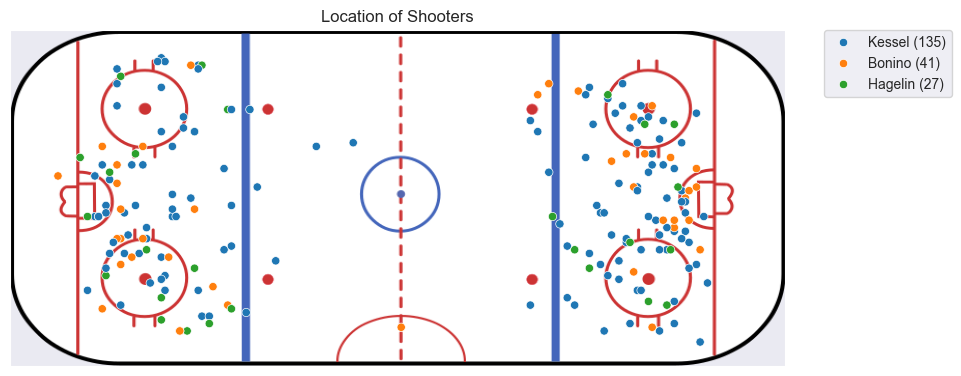

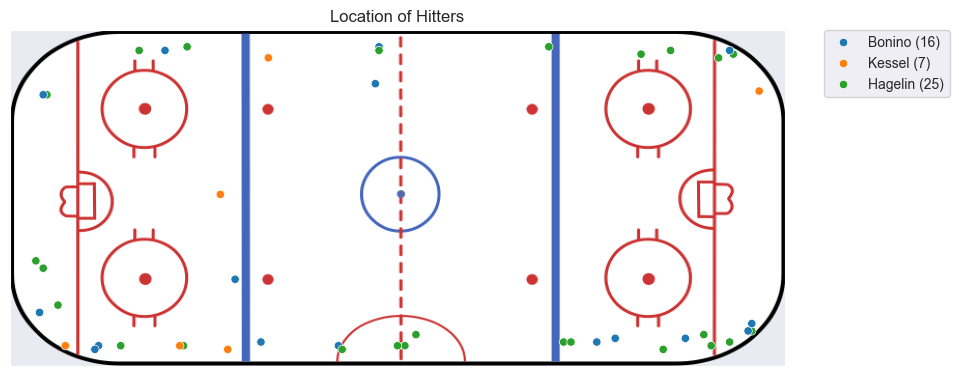

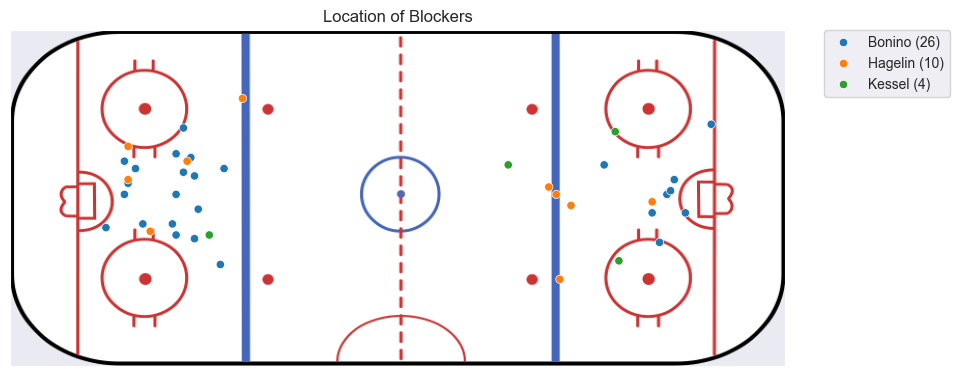

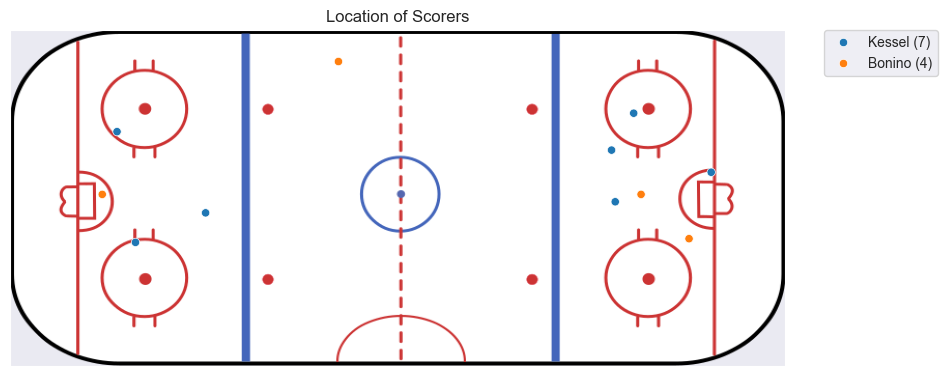

In [41]:
#graphs location and number of good plays for the HBK line 
for type in good_player_types:
    plotHockeyPoints_all_rounds(good_plays_2017_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Similar to these plot point from the 2016 analysis, Kessel massively dominated the line on shots made, and scored almost double the goals as Bonino. 

Although Hagelin scored no goals, he procured a huge majority of the hits, and more than twice as many blocks as Kessel.

Bonino, similar to the previous year, was responsible for most of the blocked shots on net - typical for the Center.

### Now for the 'bad' plays for the HBK line
- Hittee (recipient of a hit)
- Shooter (of a blocked shot - failed scoring attempt)
- DrewBy (drew a penalty, thus resulting in the opposing team's power play)

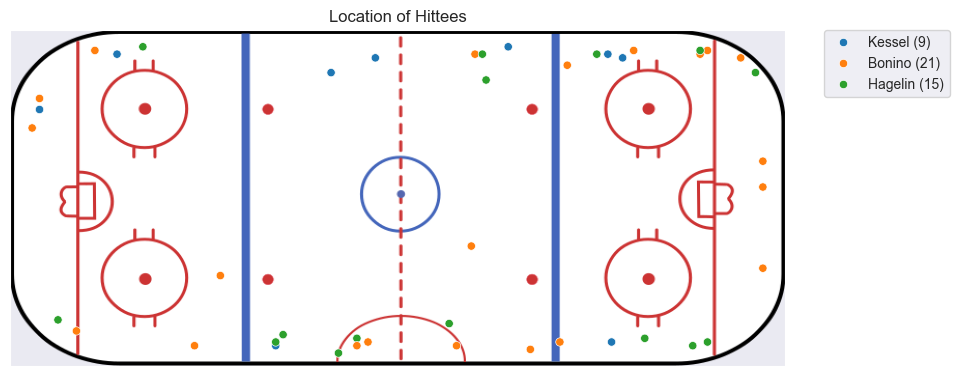

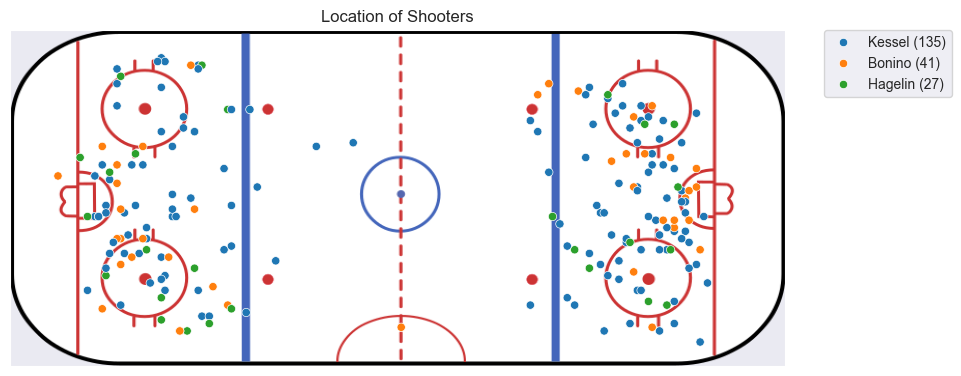

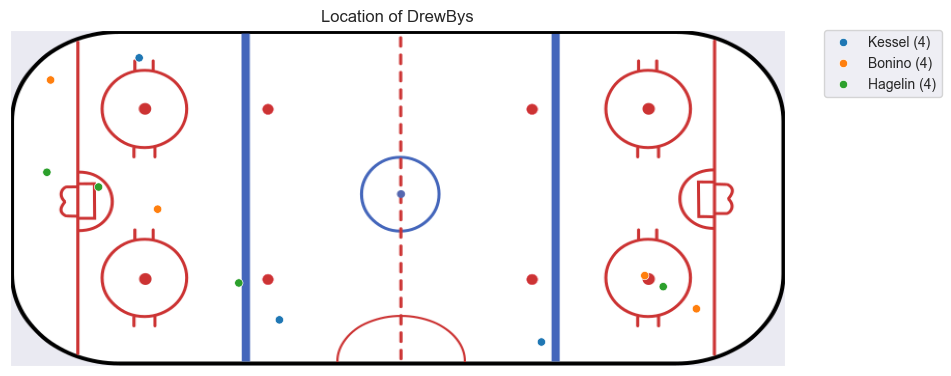

In [42]:
for type in bad_player_types:
    plotHockeyPoints_all_rounds(bad_plays_2017_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

For 2017, there seemed to be less of a discrepency with "bad" plays. Bonino took more hits than Hagelin this year, which is interesting given how many more hits Hagelin gave during the playoffs. 

Kessel naturally had more blocked shots, further showing how powerful he was on the ice. A true shot machine.

All three players only drew 4 penalties throughout the entire playoff season. Impressive.

### Last, let's look at Takeaways and Giveaways

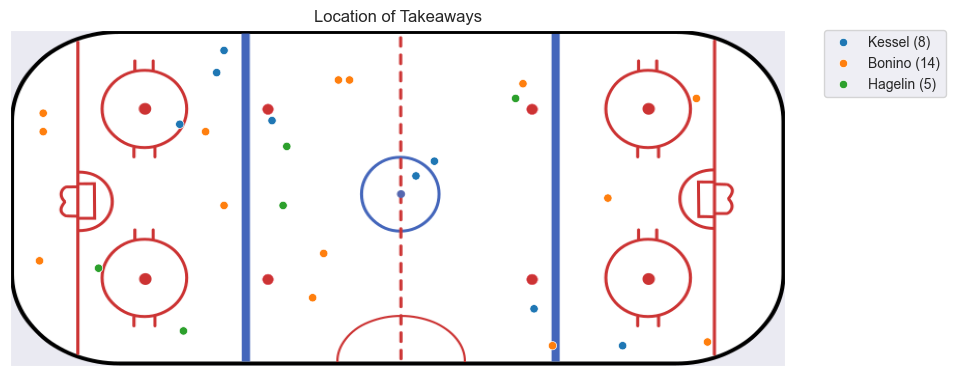

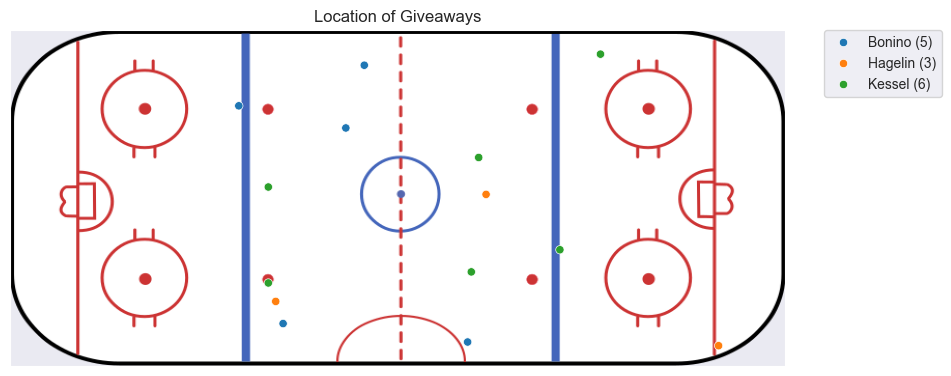

In [43]:
plotHockeyPoints_all_rounds(good_plays_2017_all_rounds, column='event', column_filter='Takeaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])
plotHockeyPoints_all_rounds(bad_plays_2017_all_rounds, column='event', column_filter='Giveaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Once again, Bonino had the most takeaways on the HBK line, but this year Hagelin suffered the fewest giveaways. 

The numbers of giveaways are also extremely low, even compared to the previous year for this same line (5,3,6 instead of 9,12,14 respectively). This line did not easily or often give up the puck.

## Next, let's get into some more advanced stats and succes metrics
### We'll use two dataFrames. 
- The first, with more basic stats, has the advantage of being broken down into games, meaning we can eventually group by round if needed
- The second, has complex stats, but only for the entire playoff season

#### To combine the two initially for a great overall understanding, we can aggregate the first dF by player and merge it with the second.

In [46]:
pens_2017_playoff_skater_stats_basic = pd.read_sql_query(q.skater_stats_2017_query,conn)

In [47]:
pens_2017_playoff_skater_stats_basic.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'primaryPosition', 'abbreviation'],
      dtype='object')

#### Clean it up by removing unwanted columns

In [48]:
pens_2017_playoff_skater_stats_basic = pens_2017_playoff_skater_stats_basic.drop(['player_id','team_id'], axis=1)

#### Form the aggregated dataframe to prepare for a merge

In [49]:
players_2017_sums_df = pens_2017_playoff_skater_stats_basic.groupby('lastName').aggregate({'goals':'sum', 'assists':'sum', 'plusMinus':'sum', 'hits':'sum', 'game_id':'count', 'timeOnIce':'mean', 'shots':'sum', 'takeaways':'sum','giveaways':'sum','blocked':'sum'}).reset_index()

### Now let's put together the advanced stats dataframe

In [50]:
pens_2017_playoff_skater_stats_adv = pd.read_csv('2017_adv_stats_pens_playoffs.csv',header=1)

In [51]:
#see what null values exist
null_counts = pens_2017_playoff_skater_stats_adv.isnull().sum()
print(null_counts[null_counts > 0])

E+/-    23
dtype: int64


In [56]:
#drop all nulls, since it is just an empty column
pens_2017_playoff_skater_stats_adv = pens_2017_playoff_skater_stats_adv.dropna(axis=1)

#### Now let's easily add the first and last name columns, reusing work done previously with the roster:

In [57]:
pens_2017_playoff_skater_stats_adv = pd.merge(pens_2017_playoff_skater_stats_adv, Pens_2017_roster[['Player', 'firstName', 'lastName']], on='Player', how='left')

In [58]:
pens_2017_playoff_skater_stats_adv.columns

Index(['Rk', 'Player', 'Age', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'SAtt.', 'Thru%', '-9999', 'firstName',
       'lastName'],
      dtype='object')

In [59]:
#drop unwanted columns
pens_2017_playoff_skater_stats_adv = pens_2017_playoff_skater_stats_adv.drop(['Player','Age','-9999'], axis=1)

In [60]:
#get the list of column names
columns = list(pens_2017_playoff_skater_stats_adv.columns)
#specify the new column order
new_order = columns[-2:] + columns[:-2]
#reorder the columns in the DataFrame
pens_2017_playoff_skater_stats_adv = pens_2017_playoff_skater_stats_adv[new_order]
#take a look
pens_2017_playoff_skater_stats_adv.head()

,firstName,lastName,Rk,Pos,GP,CF,CA,CF%,CF% rel,FF,...,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,SAtt.,Thru%
0,Josh,Archibald,1,RW,4,17,17,50.0,-5.9,10,...,85.7,85.7,33.3,66.7,7:51,7:40,0,0,6,66.7
1,Nick,Bonino,2,C,21,211,312,40.3,-7.8,173,...,96.6,103.6,28.2,71.8,16:06,12:15,15,6,51,64.7
2,Ian,Cole,3,D,25,357,401,47.1,1.3,255,...,91.3,101.8,49.4,50.6,18:03,15:31,9,17,60,38.3
3,Sidney,Crosby,4,C,24,373,384,49.3,3.8,251,...,91.7,102.8,56.2,43.8,18:43,15:31,16,15,110,57.3
4,Matt,Cullen,5,C,25,202,283,41.6,-5.7,154,...,91.5,100.3,16.8,83.2,13:49,11:14,4,6,34,64.7


## Now we can put the basic and advanced stats all together into one large DataFrame

In [61]:
pens_player_stats_2017 = pd.merge(players_2017_sums_df, pens_2017_playoff_skater_stats_adv, on='lastName')

In [62]:
pens_player_stats_2017.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.', 'Thru%'],
      dtype='object')

In [63]:
#duplicate values exist (some with different column names), let's get rid of them

# Transpose the DataFrame and identify duplicate rows (duplicate columns after transposing)
duplicates = pens_player_stats_2017.T[pens_player_stats_2017.T.duplicated()].index
# Drop duplicate columns
pens_player_stats_2017 = pens_player_stats_2017.drop(columns=duplicates, errors='ignore')
#verify
pens_player_stats_2017.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.', 'Thru%'],
      dtype='object')

## Here we begin to look more deeply at measures of success over the course of the 2016 playoffs

### Shot Statistics Overview

In hockey analytics, shot statistics provide valuable insights into a team's or player's offensive performance. Let's explore key shot metrics:

**Shots Attempted (SAtt.)** Total number of shots attempted in all game situations.

**Shots on Goal (Shots)** Subset of attempted shots that were on target and required the goaltender to make a save.

**Through Percentage (Thru%)** Percentage of shots that successfully made it through to the net out of the total shots attempted (`SAtt.`).

**Shots Made Percentage (Shots_made_percent)** Percentage of shots on goal that resulted in a goal.

By examining these shot statistics, analysts and fans gain a comprehensive understanding of the offensive dynamics, accuracy, and goal-scoring proficiency of a team or player. These metrics contribute to a nuanced evaluation of performance beyond traditional box score statistics.


In [64]:
#calculate percent of successful shots:
pens_player_stats_2017['shot_success_rate'] = (pens_player_stats_2017['goals']/pens_player_stats_2017['shots'])*100
#separate shots stats into their own df
shooting_stats_2017 = pens_player_stats_2017[['lastName','SAtt.','shots','shot_success_rate','goals']].sort_values(by='SAtt.', ascending=False)
#print the resulting df, sorted by all shots made
shooting_stats_2017

,lastName,SAtt.,shots,shot_success_rate,goals
10,Kessel,153,68,11.764706,8
3,Crosby,110,63,12.698413,8
12,Malkin,99,60,16.666667,10
7,Guentzel,91,52,25.000000,13
17,Sheary,68,44,4.545455,2
15,Rust,68,42,16.666667,7
16,Schultz,62,26,15.384615,4
2,Cole,60,23,0.000000,0
19,Wilson,55,39,7.692308,3
6,Dumoulin,53,25,4.000000,1


#### Let's visualize these numbers for the top five scorers

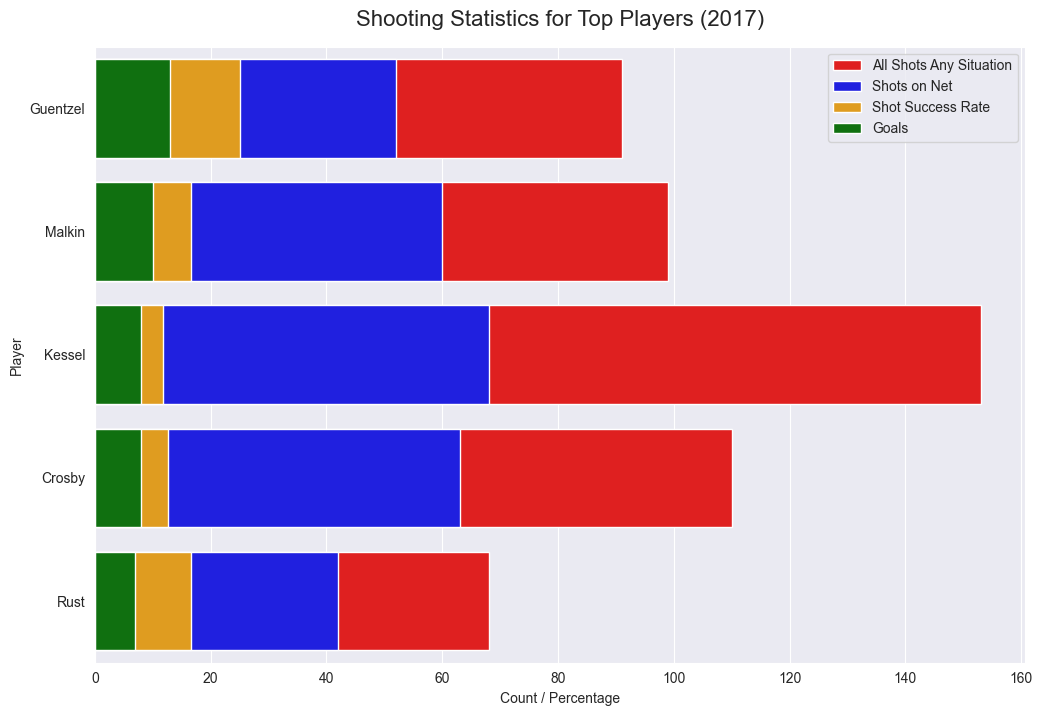

In [65]:
# Sort the DataFrame by shots made
shooting_stats_2017_sorted = shooting_stats_2017.sort_values(by='goals', ascending=False)

# Select the top N players (e.g., top 5)
top_players = shooting_stats_2017_sorted.head(5)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(x='SAtt.', y='lastName', data=top_players, color='red', label='All Shots Any Situation')
sns.barplot(x='shots', y='lastName', data=top_players, color='blue', label='Shots on Net')
sns.barplot(x='shot_success_rate', y='lastName', data=top_players, color='orange', label='Shot Success Rate')
sns.barplot(x='goals', y='lastName', data=top_players, color='green', label='Goals')


plt.xlabel('Count / Percentage')
plt.ylabel('Player')
plt.title('Shooting Statistics for Top Players (2017)', fontsize=16, y=1.02)
plt.legend()
plt.show()

Similar to the previous year, in 2017 Kessel far out-shot any teammates. Although his success rate actually improved this year, he was only ranked third in goals acheived behind Jake Guenztel and Evgeni Malkin. 

Important to note here that, for 2017 he ranked higher than Sidney Crosby for all of the above shot metrics.

#### Goals are more than just the scorer. How do the players rank on assists?

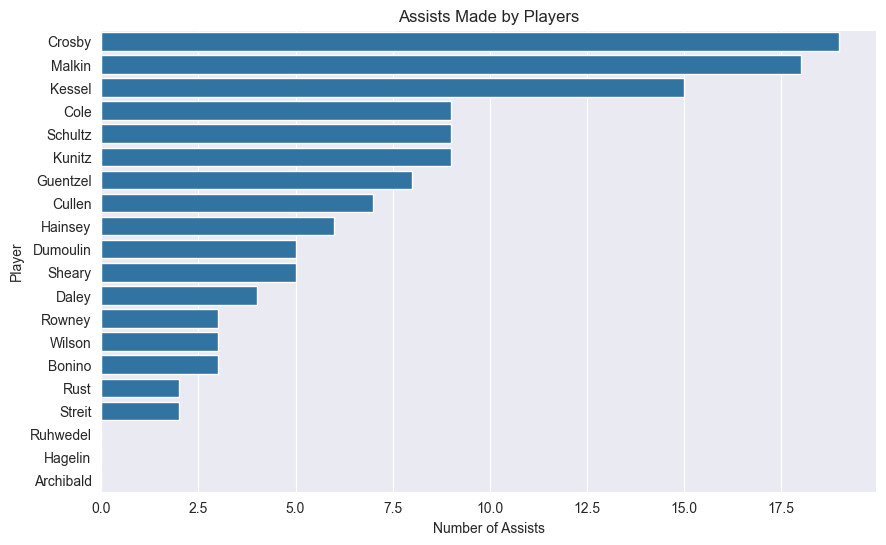

In [66]:
# Sort the DataFrame by the number of assists
pens_player_stats_2017 = pens_player_stats_2017.sort_values(by='assists', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='assists', y='lastName', data=pens_player_stats_2017)

plt.title('Assists Made by Players')
plt.xlabel('Number of Assists')
plt.ylabel('Player')
plt.show()

This graph shows a big departure from the 2016 playoffs. Crosby and Malkin dominate on assists (which makes sense, since they play with Guentzel and Rust). 

Kessel is the only member of the HBK line that makes the top five in assists this year, ranking third once again. Last year, Hagelin had 10 assists, and this year, none. This is an unexpected drop, and I wonder if there are different circumstances that I'm unaware of. Definitely something to investigate in the future.

## CORSI and Fenwick are two common ways to measure player success. Below, we look at the CORSI For % (CF%) and Fenwick For % (FF%):


**Corsi For (CF)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) generated by a team or player while they are on the ice.
It is an indicator of offensive activity and measures how often a team or player is involved in offensive plays.


**Corsi Against (CA)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) faced by a team or player while they are on the ice.
It is an indicator of defensive activity and measures how often a team or player is defending against shot attempts from the opposing team.

**CF% = CF/(CF+CA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.



**Fenwick For (FF)** represents the total number of unblocked shot attempts (shots on goal and missed shots) generated by a team or player while they are on the ice.
FF does not include blocked shots in the count, focusing on shots that reach the net or miss the net entirely.


**Fenwick Against (FA)** represents the total number of unblocked shot attempts (shots on goal and missed shots) faced by a team or player while they are on the ice.
Similar to FF, FA excludes blocked shots, providing a measure of defensive activity without considering shots that were blocked by the opposing team.

**FF% = FF/(FF+FA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.


In [68]:
Corsi_Fenwick_stats_2017 = pens_player_stats_2017[['lastName','CF%', 'FF%']].sort_values(by='CF%', ascending=False)

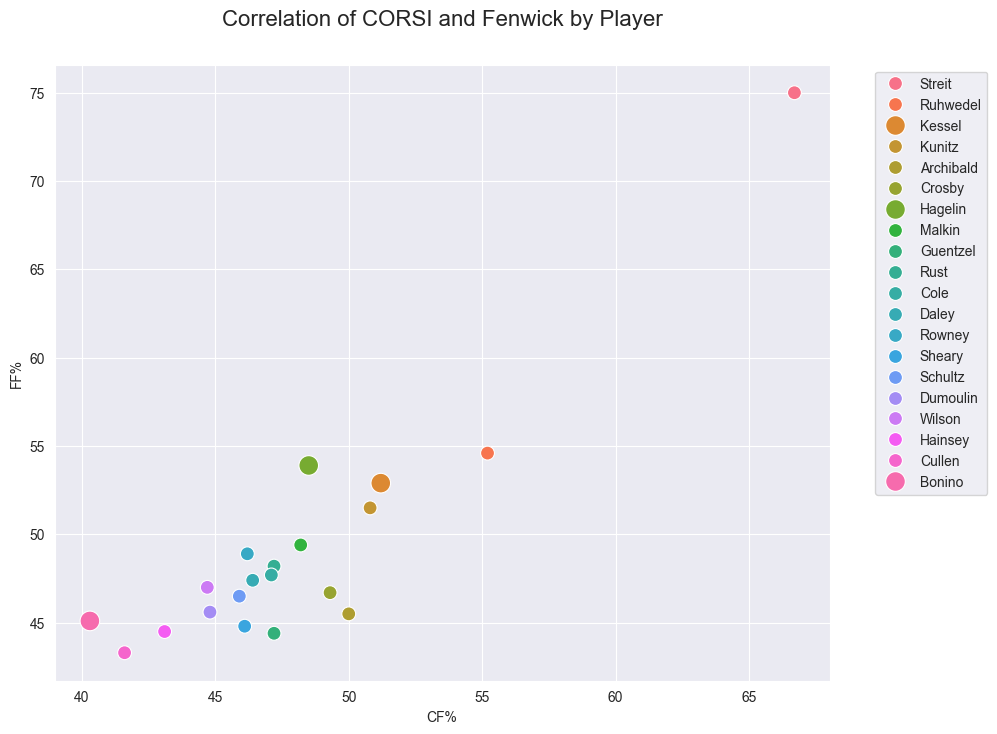

In [69]:
players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2017, hue='lastName', size='lastName',
                sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2017['lastName']})



plt.title('Correlation of CORSI and Fenwick by Player', fontsize=16, y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Due to Streit being a major outlier, this graph is much harder to analyze. 

It would be worth investigating why he is such an outlier in the future, whether it is data error or another anomoly. For now, I'd like to graph the same thing again excluding his metrics.

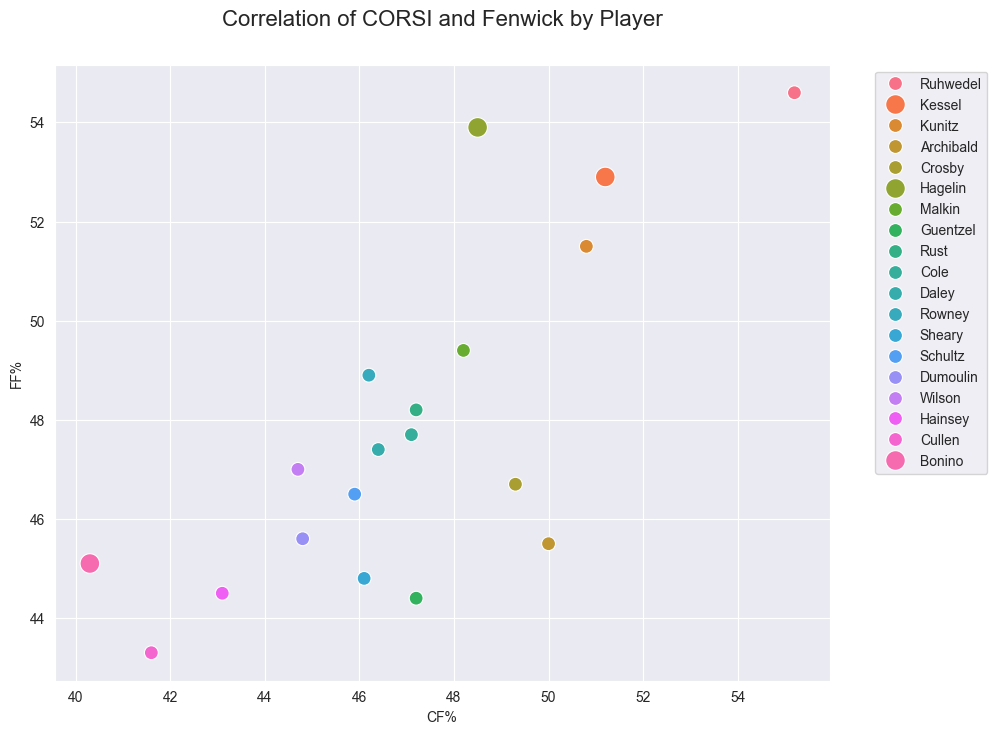

In [70]:
#exclude Streit from the DataFrame
Corsi_Fenwick_stats_2017_no_outlier = Corsi_Fenwick_stats_2017[Corsi_Fenwick_stats_2017['lastName'] != 'Streit']

players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2017_no_outlier, hue='lastName', size='lastName',
                sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2017_no_outlier['lastName']})

plt.title('Correlation of CORSI and Fenwick by Player', fontsize=16, y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


The relationship between metrics seems less obviously linear this year, but there still remains a likely correlation.

In this graph, we can see that our HBK line players are more dispersed in 2017 than in 2016, with regard to CF% and FF%. 

Bonino now has the lowest CORSI score and one of the lowest Fenwick scores. 

Kessel and Hagelin, on the other hand, have some of the highest Fenwick Scores, and are in the top 50% of CORSI scores. Kessel outranks everyone except for Chad Ruhwedel this year.

## "Puck Luck"
**PDO, often referred to as "Puck Luck,"** is a composite statistic in hockey analytics that combines a team's on-ice shooting percentage (Shooting Percentage or Sh%) and save percentage (Save Percentage or Sv%) in order to assess a team's overall efficiency in converting scoring chances into goals. The term "PDO" itself doesn't stand for anything specific; it's just a name given to this combined metric.

The formula for PDO is:

PDO = Shooting Percentage + Save Percentage


Here's a breakdown of the components:



**Shooting Percentage (oiSH%)** represents the proportion of shots on goal that result in goals. It is calculated as the number of goals scored divided by the number of shots on goal.
Shooting Percentage (Sh%) = (Goals / Shots on Goal) * 100


**Save Percentage (oiSV%)** represents the proportion of shots on goal that are stopped by the goaltender. It is calculated as the number of saves divided by the number of shots on goal faced by the goaltender.
Save Percentage (Sv%) = (Saves / Shots on Goal Faced) * 100

By combining Shooting Percentage and Save Percentage, PDO aims to capture the overall randomness and variability in a team's performance that may not be entirely within their control. A high PDO may indicate that a team is experiencing above-average luck, while a low PDO may suggest below-average luck. Over the long term, teams are generally expected to regress towards an average PDO of around 100.

It's important to note that while PDO can provide insights into short-term luck or variance, it is not necessarily a predictive metric for long-term team success. Teams with consistently high PDO may be benefiting from luck, but sustained success often requires strong underlying performance in other aspects of the game.

In [71]:
puck_luck_2017 = pens_player_stats_2017[['lastName','oiSH%', 'oiSV%','PDO']].sort_values(by='PDO', ascending=False)

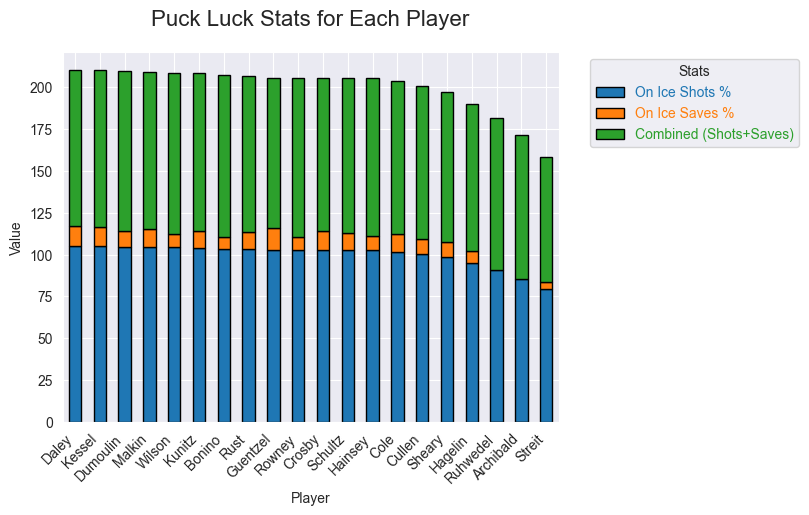

In [73]:
puck_luck_2017_melted = pd.melt(puck_luck_2017, id_vars='lastName')

# Pivot the DataFrame for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2017_melted.pivot(index='lastName', columns='variable', values='value')

# Sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)

# Use Seaborn stacked barplot
ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')

plt.title('Puck Luck Stats for Each Player', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

# Customize legend labels
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()

# Create a separate legend
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in puck_luck_2017_melted['variable'].unique()],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust legend color
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

# Rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

#### Just for fun, let's look at this same graph, but just for Forwards; players that are Right Wing, Center, or Left Wing

In [74]:
puck_luck_forwards_2017 = pens_player_stats_2017[['lastName','oiSH%', 'oiSV%','PDO', 'Pos']].sort_values(by='PDO', ascending=False)

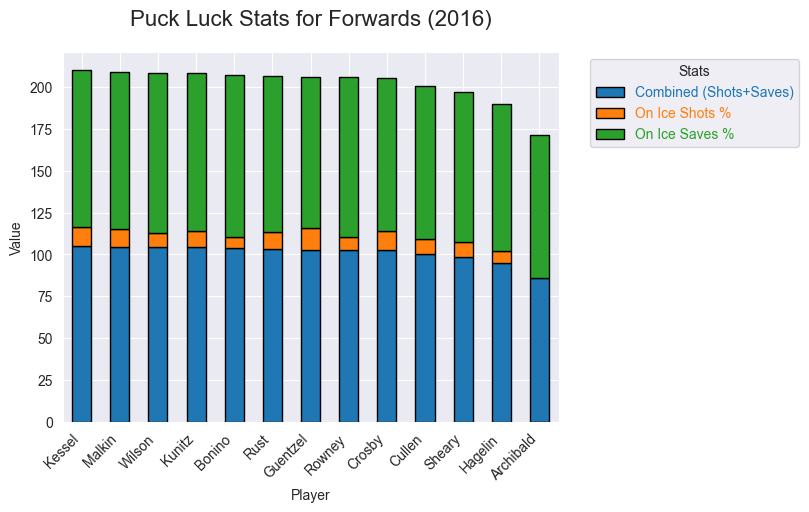

In [75]:
selected_positions = ['C', 'LW', 'RW']
puck_luck_2017_filtered = puck_luck_forwards_2017[puck_luck_forwards_2017['Pos'].isin(selected_positions)]
#melt the DataFrame
puck_luck_2017_melted = pd.melt(puck_luck_2017_filtered, id_vars='lastName', var_name='variable', value_name='value')
#create a pivot table for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2017_melted[puck_luck_2017_melted['variable'] != 'Pos'].pivot_table(
    index='lastName', columns='variable', values='value', aggfunc='sum')
#sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)
#plot
ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Puck Luck Stats for Forwards (2016)', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

#customize legend labels and create
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in df_puck_luck_pivoted.columns],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

#rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

Once again, 2017 looks very different than 2016. This year during the playoffs, Hagelin, Bonino, and Kessel are more evenly distributed in the lineup, as well as Malkin, Crosby, Kunitz, and Sheary.

This year, Kessel seems to have fantastic "Puck Luck", whereas Hagelin scored much lower than I would have expected, given the previous data.

## Plus / Minus

PlusMinus, or +/- indicates the relationship between goals scored for the team, vs goals scored against the team. 

There is debate regarding the value, and yet this metric is commonly used in all of hockey analytics. 

The easiest way to consider player +/- is with visualizations:

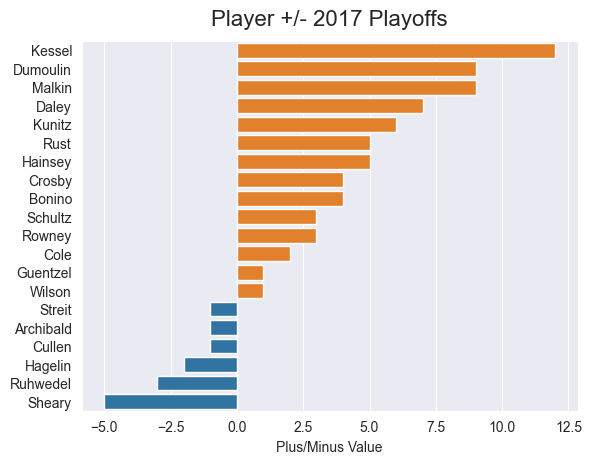

In [77]:
sns.barplot(x='plusMinus', y='lastName', data=pens_player_stats_2017, orient='h', hue=pens_player_stats_2017['plusMinus'] >= 0, order=pens_player_stats_2017.sort_values('plusMinus', ascending=False)['lastName'])
plt.xlabel('Plus/Minus Value')
plt.ylabel('')
plt.title('Player +/- 2017 Playoffs', fontsize=16, y=1.02)
plt.legend().set_visible(False)
plt.show()

When looking at straight +/- , Phil Kessel clearly comes out on top. This makes sense, considering Kessel's goal count.

Bonino has a more modest +/-, but remains in the positive. Hagelin retains a negative value. This is surprising, because of his connection to Phil Kessel. I'm not sure in this case, but I hypothesize that Kessel played in many power plays without Hagelin- although I need to look more deeply into the data to see if this is true. Another idea for a future project.

## No way around it, goals are important

### Looking at goals for the entire 2016 playoffs vs. average icetime per player:
As we learned in the 2016 study, it makes the most sense to only look at forwards for comparison.

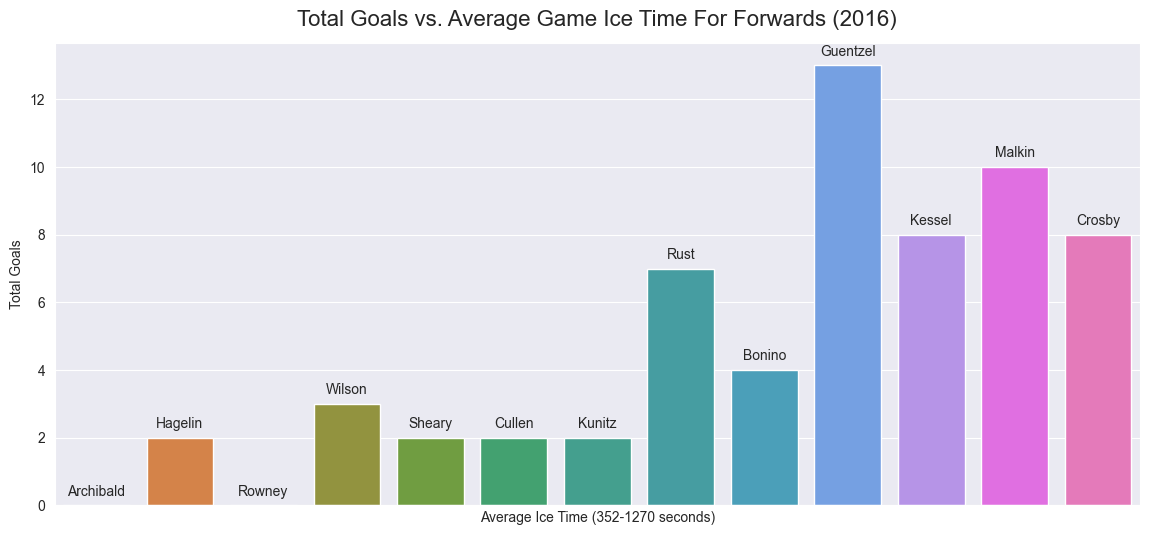

In [78]:
selected_positions = ['C', 'LW', 'RW']
filtered_data = pens_player_stats_2017[pens_player_stats_2017['Pos'].isin(selected_positions)]

plt.figure(figsize=(14, 6))
# Create the bar plot
ax = sns.barplot(data=filtered_data, x='timeOnIce', y='goals', hue='lastName', dodge=False, err_kws={'color': 'None'})

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Annotate each bar with player name
for p, player_name in zip(ax.patches, labels):
    ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Average Ice Time (352-1270 seconds)')
plt.ylabel('Total Goals')
plt.title('Total Goals vs. Average Game Ice Time For Forwards (2016)', fontsize=16, y=1.02)
plt.xticks([])  # Remove x-axis labels
plt.legend().set_visible(False)  # Remove legend
plt.show()

This year, there seems to be a similar correlation between ice time and goals. However, unlike last year when Kessel was an outlier with substantially more goals vs. icetime, this year Guentzel is awarded that impressive acheivement. 

This also shows how little icetime on average Hagelin had during the 2017 playoffs. This indicates that for future study, I need to look into what/how many games he missed, and who took his place with Kessel and Bonino. The lack of icetime definitely helps to explain some of the other poor metrics we've seen for Hagelin this year.

### Visualizing as a percent of the whole, with a focus on Hagelin, Bonino and Kessel:

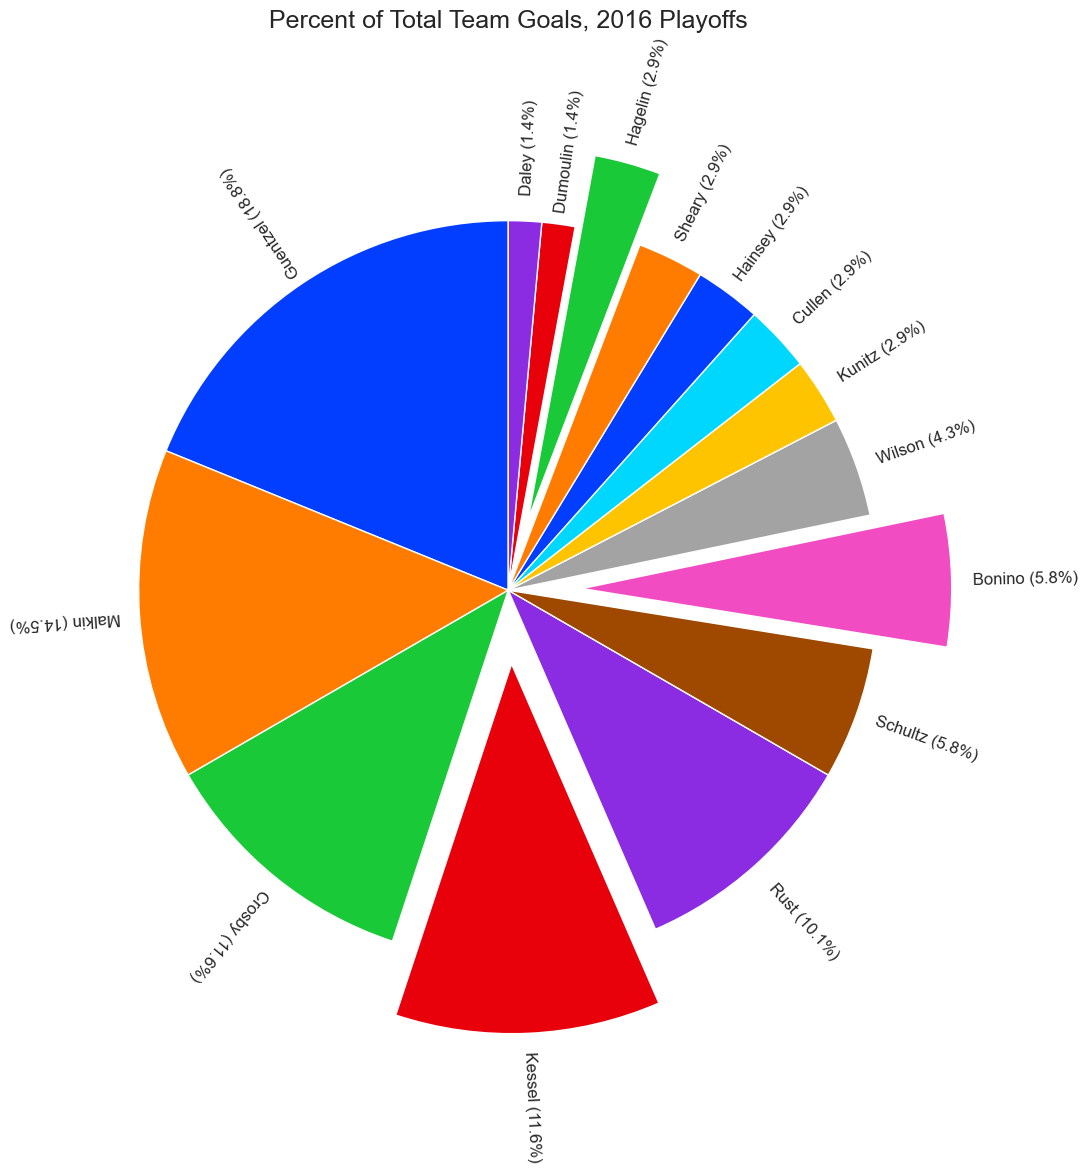

In [81]:
#filter players with non-zero goals
pens_player_stats_2017 = pens_player_stats_2017[pens_player_stats_2017['goals'] > 0]

labels = pens_player_stats_2017['lastName']
sizes = pens_player_stats_2017['goals']
colors = sns.color_palette("bright")
#sort by 'goals' in descending order
pens_player_stats_2017 = pens_player_stats_2017.sort_values(by='goals', ascending=False)
#define explode for specific slices
explode = [0.2 if label in ['Bonino', 'Hagelin', 'Kessel'] else 0 for label in labels]

plt.figure(figsize=(12, 12))
#draw pie chart without autopct labels
patches, _ = plt.pie(sizes, labels=None, startangle=90, colors=colors, explode=explode)

#calculate and display percentage labels
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (patches[i].theta1 + patches[i].theta2) / 2
    x = patches[i].center[0] + patches[i].r * 1.2 * np.cos(np.radians(angle))
    y = patches[i].center[1] + patches[i].r * 1.2 * np.sin(np.radians(angle))
    
    #calculate percentage
    percentage = (size / sizes.sum()) * 100
    
    plt.text(x, y, f'{label} ({percentage:.1f}%)', ha='center', va='center', rotation=angle, fontsize=12)

plt.title('Percent of Total Team Goals, 2016 Playoffs', fontsize=18, y=1.10)
plt.savefig('PercentTotalGoals2016.png')
plt.show()

The 2017 Playoffs look very different from the previous year. This year, the HBK line only accounted for 20.3% of all goals.

Let's compare again to the other typical lines:
- first line (Crosby, Sheary, Guentzel) scored 33.3% of all goals (a full third!)
- second line (Malkin, Kunitz, Rust) scored 27.5% of all goals

This is a more typical progression for the 1st, 2nd, and 3rd lines in hockey. For this year, based on goals alone, it is difficult to determine whether the HBK line had a stronger than expected impact on the Penguins Stanley Cup win.